**MNSIT Handwritten Digit Classification using Neural Network**

Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the Data

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


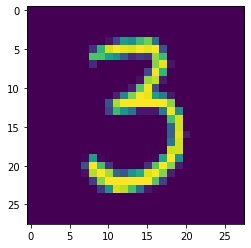

Label:  3 



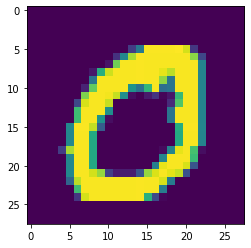

Label:  0 



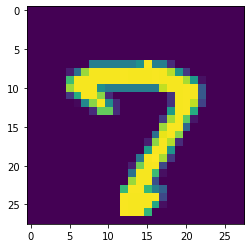

Label:  7 



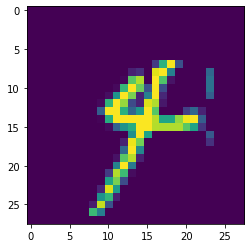

Label:  4 



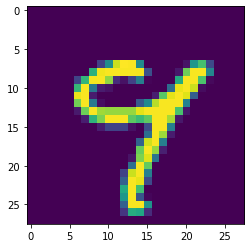

Label:  9 



In [4]:
 # Displaying few images

for i in range(5):
  plt.imshow(x_train[50+i])
  plt.show()
  print("Label: ",y_train[50+i],"\n")


In [5]:
# Scaling the values
x_train = x_train/255
x_test = x_test/255

Building the Neural Network

In [6]:
input_shape = (28,28,1)

In [7]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
# Compiling the Neural Network

model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [9]:
# Training the Neural Network

model.fit(x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 11s 5ms/step - loss: 0.2607 - accuracy: 0.9220 - val_loss: 0.1017 - val_accuracy: 0.9707
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1162 - accuracy: 0.9654 - val_loss: 0.0769 - val_accuracy: 0.9761
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0836 - accuracy: 0.9741 - val_loss: 0.0662 - val_accuracy: 0.9797
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0648 - accuracy: 0.9801 - val_loss: 0.0600 - val_accuracy: 0.9833
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9830 - val_loss: 0.0560 - val_accuracy: 0.9834
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9853 - val_loss: 0.0649 - val_accuracy: 0.9823
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9878 - val_loss: 0.0624 - val_accuracy

In [10]:
loss_train, accuracy_train = model.evaluate(x_train, y_train)
print("Accuracy of the model in training dataset: ",accuracy_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9962
Accuracy of the model in training dataset:  0.9962000250816345


Evaluation of the model

In [11]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print("Accuracy of the model in test dataset",accuracy_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9837
Accuracy of the model in test dataset 0.9836999773979187


Predicting image labels of test data

In [12]:
y_pred = model.predict(x_test)
print("Dimensions of prediction probabilities: ", y_pred.shape)

# Converting the prediction probabilities to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print("Prediction labels for test set: ",y_pred_labels)

Dimensions of prediction probabilities:  (10000, 10)
Prediction labels for test set:  [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4

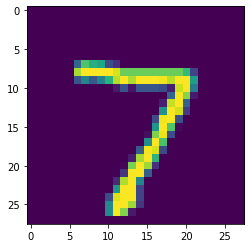

Actual label:  7
Predicted label:  7 



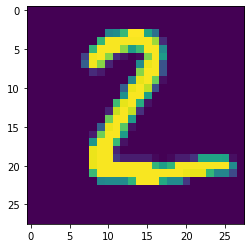

Actual label:  2
Predicted label:  2 



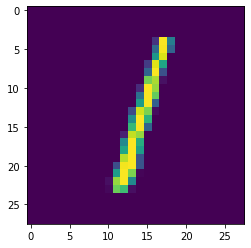

Actual label:  1
Predicted label:  1 



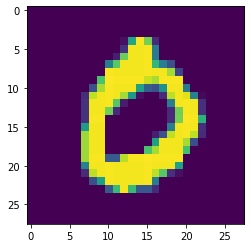

Actual label:  0
Predicted label:  0 



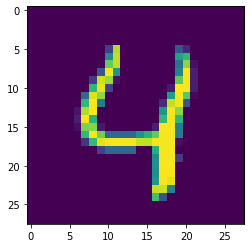

Actual label:  4
Predicted label:  4 



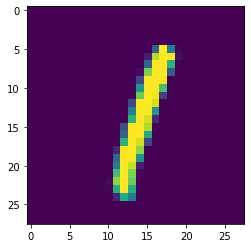

Actual label:  1
Predicted label:  1 



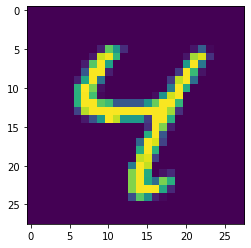

Actual label:  4
Predicted label:  4 



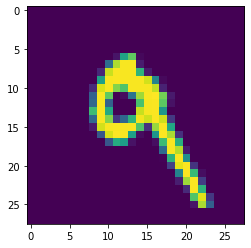

Actual label:  9
Predicted label:  9 



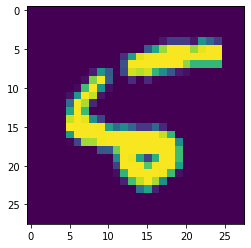

Actual label:  5
Predicted label:  5 



In [13]:
# Predicting image labels 

for i in range(9):
  plt.imshow(x_test[i])
  plt.show()
  print("Actual label: ",y_test[i])
  print("Predicted label: ", y_pred_labels[i], "\n")


Visualising Confusion Matrix 

Text(0.5, 42.0, 'Predicted Labels')

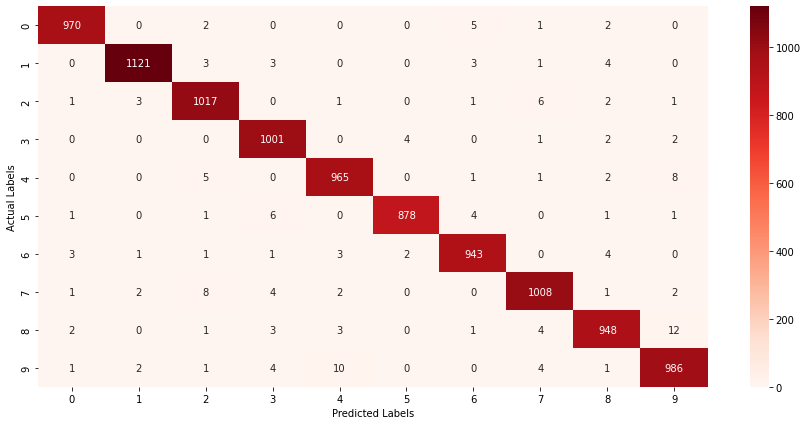

In [14]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

Building a predective system

Path of the image: /content/testimg.png


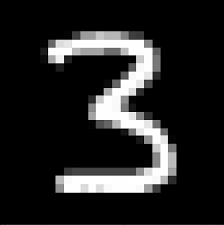

The handwritten Digit is:  3


In [17]:
input_image_path = input("Path of the image: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resized = cv2.resize(grayscale, (28,28))
input_image_resized = input_image_resized/255
image_reshaped = np.reshape(input_image_resized, [1,28,28])
input_pred = model.predict(image_reshaped)
input_pred_label = np.argmax(input_pred)
print("The handwritten Digit is: ", input_pred_label)